# Lab 4: Support Vector Machines, Neural Networks and Convolutional Neural Networks

Using 13D Wine Dataset

In [24]:
from platform import python_version

print(python_version())

3.7.7


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import tensorflow as tf

# Load Data

In [26]:
wineData = np.load('wineData.npy')
wineLabels = np.load('wineLabels.npy')


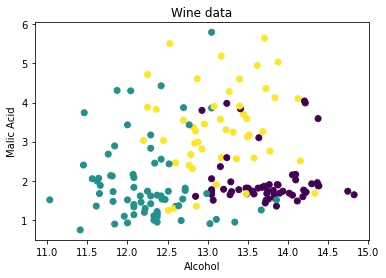

In [27]:

plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)

# Add title and axis names
plt.title('Wine data')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


plt.show()


Split data into testing and training 80-20 split

In [28]:
#wineData, wineLabels = shuffle(wineData, wineLabels, random_state=0) #make sure the samples are not ordered
xTrn, xTst, yTrn, yTst = train_test_split(wineData, wineLabels, test_size=0.2)

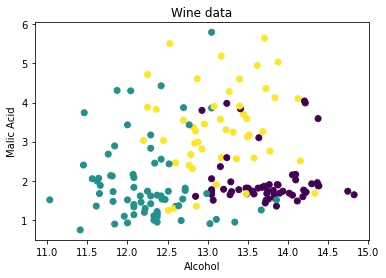

In [29]:
plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)

# Add title and axis names
plt.title('Wine data')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()

# Plot showing test/train split

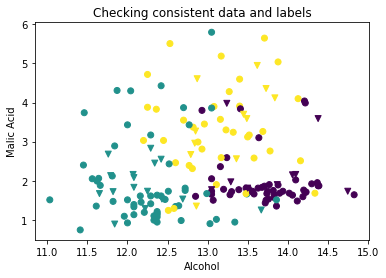

In [30]:
plt.figure()

plt.scatter(xTrn[:,0], xTrn[:,1], c=yTrn, marker="o")
plt.scatter(xTst[:,0], xTst[:,1], c=yTst, marker='v')
# Add title and axis names
plt.title('Checking consistent data and labels')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


plt.show()

# Task 4.1 - Multiclass SVM for Wine Data

### Use standardScalr to standardise the class

In [31]:
normaliser = StandardScaler()
XTrn = normaliser.fit_transform(xTrn)
XTst = normaliser.transform(xTst)

### create and train a multiclass svm

In [32]:
svc = SVC(C = 2.0, kernel='sigmoid')
svc.fit(XTrn, yTrn)

SVC(C=2.0, kernel='sigmoid')

### Predict test data and find accuracy

In [34]:
XTst = svc.predict(xTst)
svc.score(XTst, yTst)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Visualise test data in scatter plot, colour the ground truth values and draw a scatter plot to visualise test data with predicted class values coloured

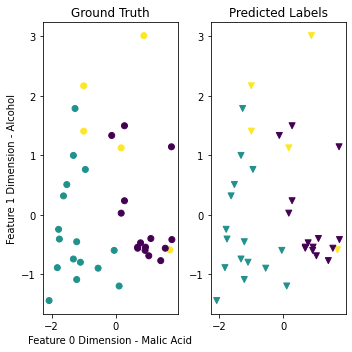

In [20]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

axes[0].set_title('Ground Truth')
axes[0].set_ylabel('Feature 1 Dimension - Alcohol')
axes[0].set_xlabel('Feature 0 Dimension - Malic Acid')

axes[1].set_title('Predicted Labels')

axes[0].scatter(XTst[:,0], XTst[:,1], c=yTst, marker="o")
axes[1].scatter(XTst[:,0], XTst[:,1], c=yTst, marker='v')
fig.tight_layout()




# 4.2 - Neural Network for Wine Data

In [22]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(yTrn)), activation=tf.nn.softmax)])

In [23]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [ ]:
history = model.fit(XTrn, yTrn, epochs=100, validation_split=0.2, verbose=1)